In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import warnings
import re

In [245]:
ipl = pd.read_csv("C://Users/pranshu/Python for data Science/Data Sets/IPL IMB381IPL2013.csv")
ipl_df = pd.DataFrame(ipl)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
ipl_df.head(50)

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000
5,6,"Bailey, GJ",2,AUS,CSK,Batsman,0,0,172,72.26,0,0.0,1,63,48,21.00,95.45,0,0,0,0.00,0.00,0.00,2009,50000,50000
6,7,"Balaji, L",2,IND,CSK+,Bowler,51,27,120,78.94,34,42.5,0,26,15,4.33,72.22,1,1342,52,25.81,7.98,19.40,2011,100000,500000
7,8,"Bollinger, DE",2,AUS,CSK,Bowler,54,50,50,92.59,62,31.3,0,21,16,21.00,165.88,1,693,37,18.73,7.22,15.57,2011,200000,700000
8,9,"Botha, J",2,SA,RR,Allrounder,83,17,609,85.77,72,53.0,1,335,67,30.45,114.73,3,610,19,32.11,6.85,28.11,2011,200000,950000
9,10,"Boucher, MV",2,SA,RCB+,W. Keeper,5515,1,4686,84.76,0,0.0,1,394,50,28.14,127.51,13,0,0,0.00,0.00,0.00,2008,200000,450000


In [246]:
ipl_df.shape

(130, 26)

In [247]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

### Multi Linear Regression Model

In [248]:
x = ipl_df.loc[:,"AGE":"AUCTION YEAR"]
x.drop(columns = ["TEAM"], inplace = True)
warnings.filterwarnings("ignore")

In [249]:
x.drop(columns = ["AUCTION YEAR"], inplace = True)

In [250]:
y = ipl_df["SOLD PRICE"]

In [251]:
dummy_column_names = ["AGE","COUNTRY","PLAYING ROLE"]
x = pd.get_dummies(x, columns = dummy_column_names, drop_first = True)

In [252]:
import statsmodels.api as sm
x = sm.add_constant(x)

#### SPLIT DATA

In [253]:
from sklearn.model_selection import train_test_split

In [254]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.8, random_state = 42)

In [255]:
import statsmodels.regression.linear_model as lm

In [256]:
model = lm.OLS(train_y, train_x).fit()


In [257]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2020-04-24 20:19        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
CAPTAINCY EXP           164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
----------------------------------------------------------------

#### identify multi colinearity

In [258]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [259]:
def vif(x):
    x_matrix = x.as_matrix()
    vif = [variance_inflation_factor(x_matrix, i) for i in range(x_matrix.shape[1])]
    vif_df = pd.DataFrame()
    vif_df["Columns"] = x.columns
    vif_df["vif"] = vif
    return vif_df

In [260]:
x_vif = x.iloc[:,1:]
df = vif(x_vif)

In [261]:
df

,Columns,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,CAPTAINCY EXP,4.245128
7,RUNS-S,16.135407
8,HS,22.781017
9,AVE,25.226566


In [262]:
columns_with_high_vif = df[df["vif"]>4]["Columns"]

#### Ckecking correlation of high VIF columns

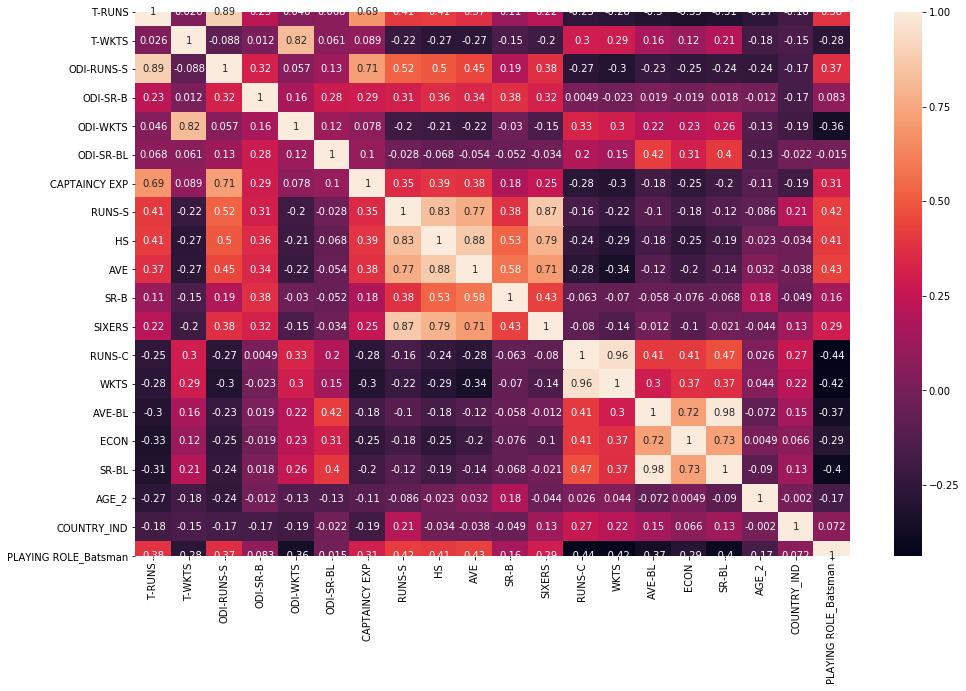

In [263]:
plt.figure(figsize = (16,10))
sn.heatmap(x[columns_with_high_vif].corr(), annot = True)

In [264]:
#columns_to_be_dropped = ["T-RUNS","CAPTAINCY EXP","T-WKTS","AVE","HS","RUNS-S","WKTS","AVE-BL","ECON"]
columns_to_be_dropped = ["T-RUNS","ODI-RUNS-S","T-WKTS","AVE","HS","RUNS-S","RUNS-C","SR-BL","ECON","ODI-SR-B","SR-B","AVE-BL","AGE_2"]

In [265]:
x.drop(columns = columns_to_be_dropped, inplace = True)

In [266]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.8, random_state = 42)

In [267]:
model_2 = lm.OLS(train_y, train_x).fit()

In [268]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.306     
Dependent Variable:        SOLD PRICE              AIC:                       2965.1884 
Date:                      2020-04-24 20:19        BIC:                       3015.4318 
No. Observations:          104                     Log-Likelihood:            -1463.6   
Df Model:                  18                      F-statistic:               3.528     
Df Residuals:              85                      Prob (F-statistic):        4.30e-05  
R-squared:                 0.428                   Scale:                     1.1990e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   165018.2667 131136.4610  1.2584 0.2117  -95716.1501  425752.6836
ODI-WKTS                   734.1123    470.0331  1.5618 0.1220    -200.4395    1668.6640
ODI-SR-BL                  170.3522   1392.9386  0.1223 0.9030   -2599.1829    2939.8873
CAPTAINCY EXP           223581.1522  98540.3915  2.2689 0.0258   27656.4541  419505.8502
SIXERS                    7307.8965   2125.6957  3.4379 0.0009    3081.4440   11534.3490
WKTS                      1884.7059   2142.8312  0.8795 0.3816   -2375.8166    6145.2283
AGE_3                   -42449.0085 101272.3502 -0.4192 0.6762 -243805.5722  158907.5552
COUNTRY_BAN            -191407.4393 373842.5107 -0.5120 0.6100 -934706.5057  551891.6272
COUNTRY_ENG             583513.6319 229452.7234  2.5431 0.0128  127300.1459 1039727.1180
COUNTRY_IND             222389.6877 107222.7169  2.0741 0.0411    9202.2008  435577.1746
COUNTRY_NZ               53596.1153 167166.8285  0.3206 0.7493 -278776.3249  385968.5556
COUNTRY_PAK              32828.5971 174395.9067  0.1882 0.8511 -313917.1874  379574.3815
COUNTRY_SA               20920.3202 134264.9930  0.1558 0.8765 -246034.4565  287875.0968
COUNTRY_SL              -15518.2591 152736.9322 -0.1016 0.9193 -319200.1997  288163.6815
COUNTRY_WI             -109502.5138 223369.7286 -0.4902 0.6252 -553621.3766  334616.3490
COUNTRY_ZIM            -133932.3067 393050.9282 -0.3408 0.7341 -915422.8532  647558.2398
PLAYING ROLE_Batsman     48413.3640 121109.2299  0.3997 0.6903 -192384.2311  289210.9590
PLAYING ROLE_Bowler     -65826.8428 112220.2651 -0.5866 0.5590 -288950.7945  157297.1089
PLAYING ROLE_W. Keeper -138290.1304 181788.9771 -0.7607 0.4489 -499735.3194  223155.0586
----------------------------------------------------------------------------------------
Omnibus:                     10.464               Durbin-Watson:                  2.331 
Prob(Omnibus):               0.005                Jarque-Bera (JB):               10.537
Skew:                        0.710                Prob(JB):                       0.005 
Kurtosis:                    3.643                Condition No.:                  1553  
========================================================================================
* The condition number is large (2e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [269]:
columns_to_keep = ["const","COUNTRY_IND", "COUNTRY_ENG", "SIXERS","CAPTAINCY EXP"]

In [270]:
x = x[columns_to_keep]

In [271]:
train_x, test_x, train_y, test_y = train_test_split(x,y, train_size = 0.8, random_state = 42)

In [272]:
model3 = lm.OLS(train_y, train_x).fit()
model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
============================================================================
Model:                 OLS                 Adj. R-squared:        0.341     
Dependent Variable:    SOLD PRICE          AIC:                   2947.7653 
Date:                  2020-04-24 20:19    BIC:                   2960.9873 
No. Observations:      104                 Log-Likelihood:        -1468.9   
Df Model:              4                   F-statistic:           14.31     
Df Residuals:          99                  Prob (F-statistic):    2.97e-09  
R-squared:             0.366               Scale:                 1.1396e+11
----------------------------------------------------------------------------
                 Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
----------------------------------------------------------------------------
const         221025.4155  54390.9774 4.0636 0.0001 113101.9161  328948.9148
COUNTRY_IND   230295.1738  70290.6472 3.2763 0.0015  90823.2802  369767.0674
COUNTRY_ENG   614602.6232 201342.7852 3.0525 0.0029 215094.8557 1014110.3907
SIXERS          6804.6900   1622.5644 4.1938 0.0001   3585.1701   10024.2098
CAPTAINCY EXP 234280.5577  76246.2595 3.0727 0.0027  82991.4372  385569.6782
----------------------------------------------------------------------------
Omnibus:                   8.587           Durbin-Watson:              2.311
Prob(Omnibus):             0.014           Jarque-Bera (JB):           8.314
Skew:                      0.660           Prob(JB):                   0.016
Kurtosis:                  3.422           Condition No.:              167  
============================================================================

"""

In [273]:
from sklearn import metrics

In [274]:
pred_y = model3.predict(test_x)

In [275]:
metrics.r2_score(test_y, pred_y), metrics.r2_score(train_y, model3.fittedvalues)

(0.3789367151245876, 0.3663772314409697)

In [276]:
probplot = sm.ProbPlot(model3.resid)

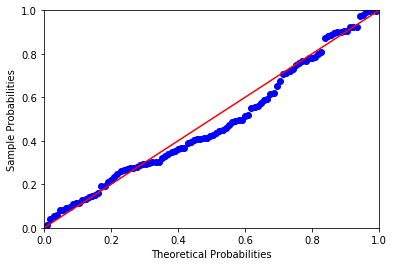

In [277]:
fig = probplot.ppplot(line = "45")
plt.show()

In [278]:
def get_standardized(value):
    return (value-value.mean())/value.std()

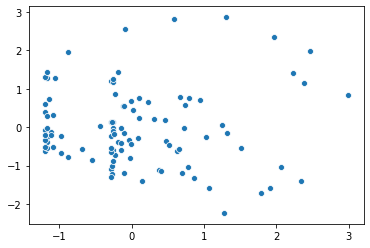

In [279]:
sn.scatterplot(get_standardized(model3.fittedvalues), get_standardized(model3.resid))

In [280]:
from statsmodels.graphics.regressionplots import influence_plot

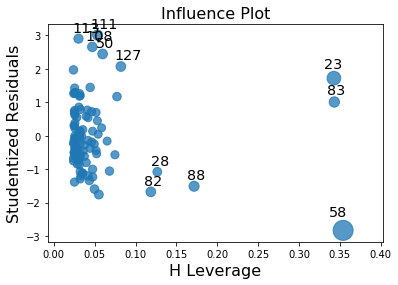

In [281]:

fig = influence_plot(model3, size = 20)
plt.show()

In [283]:
train_x = train_x.drop(index = [58,23,83])
train_y = train_y.drop(index = [58,23,83])

In [284]:
model4 = lm.OLS(train_y, train_x).fit()
model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                  OLS                Adj. R-squared:       0.307     
Dependent Variable:     SOLD PRICE         AIC:                  2855.8583 
Date:                   2020-04-24 20:19   BIC:                  2866.3187 
No. Observations:       101                Log-Likelihood:       -1423.9   
Df Model:               3                  F-statistic:          15.78     
Df Residuals:           97                 Prob (F-statistic):   1.97e-08  
R-squared:              0.328              Scale:                1.0733e+11
---------------------------------------------------------------------------
                 Coef.     Std.Err.     t    P>|t|     [0.025      0.975]  
---------------------------------------------------------------------------
const         234211.3662 53027.6400  4.4168 0.0000 128966.1795 339456.5529
COUNTRY_IND   223897.0436 68256.5112  3.2802 0.0014  88426.7632 359367.3239
COUNTRY_ENG       -0.0000     0.0000 -0.3461 0.7300     -0.0000      0.0000
SIXERS          6844.5096  1581.8177  4.3270 0.0000   3705.0393   9983.9799
CAPTAINCY EXP 197991.7813 75081.4068  2.6370 0.0097  48975.9725 347007.5902
---------------------------------------------------------------------------
Omnibus:            13.241      Durbin-Watson:         2.344               
Prob(Omnibus):      0.001       Jarque-Bera (JB):      14.133              
Skew:               0.858       Prob(JB):              0.001               
Kurtosis:           3.645       Condition No.:         74858674759561084928
===========================================================================
* The condition number is large (7e+19). This might indicate
strong multicollinearity or other numerical problems.
"""

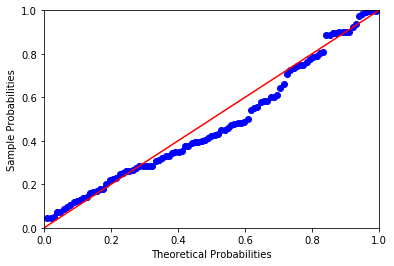

In [285]:
probplot = sm.ProbPlot(model4.resid)
probplot.ppplot(line = "45")
plt.show()

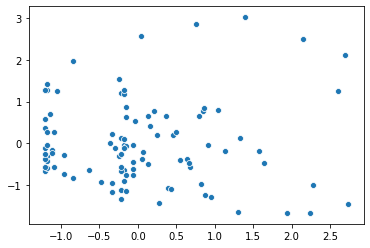

In [286]:
sn.scatterplot(get_standardized(model4.fittedvalues), get_standardized(model4.resid))

In [287]:
train_y_new = np.sqrt(train_y)

In [288]:
model5 = lm.OLS(train_y_new, train_x).fit()
model5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.306    
Dependent Variable: SOLD PRICE       AIC:                1385.7949
Date:               2020-04-24 20:20 BIC:                1396.2554
No. Observations:   101              Log-Likelihood:     -688.90  
Df Model:           3                F-statistic:        15.70    
Df Residuals:       97               Prob (F-statistic): 2.13e-08 
R-squared:          0.327            Scale:              51229.   
------------------------------------------------------------------
                 Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------
const           470.5643  36.6358 12.8444 0.0000 397.8522 543.2763
COUNTRY_IND     157.0294  47.1572  3.3299 0.0012  63.4354 250.6234
COUNTRY_ENG      -0.0000   0.0000 -0.0203 0.9838  -0.0000   0.0000
SIXERS            4.7286   1.0928  4.3268 0.0000   2.5596   6.8976
CAPTAINCY EXP   132.4346  51.8724  2.5531 0.0122  29.4822 235.3869
------------------------------------------------------------------
Omnibus:          3.622   Durbin-Watson:      2.364               
Prob(Omnibus):    0.163   Jarque-Bera (JB):   2.441               
Skew:             0.196   Prob(JB):           0.295               
Kurtosis:         2.348   Condition No.:      74858674759561084928
==================================================================
* The condition number is large (7e+19). This might indicate
strong multicollinearity or other numerical problems.
"""

### Using sklearn

In [304]:
x = ipl_df.loc[:,"AGE":"AUCTION YEAR"]
x.drop(columns = ["TEAM"], inplace = True)
warnings.filterwarnings("ignore")

x.drop(columns = ["AUCTION YEAR"], inplace = True)

y = ipl_df["SOLD PRICE"]

dummy_column_names = ["AGE","COUNTRY","PLAYING ROLE"]
x = pd.get_dummies(x, columns = dummy_column_names, drop_first = True)

import statsmodels.api as sm
x = sm.add_constant(x)



In [305]:
from sklearn.preprocessing import StandardScaler

In [306]:
normalize = StandardScaler()

In [307]:
scalar_x = normalize.fit_transform(x)
scalar_y = (y-y.mean())/y.std()

In [308]:
#### SPLIT DATA

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(scalar_x,scalar_y, train_size = 0.8, random_state = 42)

In [309]:
from sklearn.linear_model import LinearRegression

In [310]:
lin_reg = LinearRegression()

In [311]:
model6 = lin_reg.fit(train_x,train_y)

In [318]:
model6.score(train_x, train_y)

0.5538424305356855

In [319]:
from sklearn.linear_model import ridge, Lasso

In [365]:
lasso = Lasso(alpha = 0.1)

In [366]:
model7 = lasso.fit(train_x, train_y)

In [367]:
from sklearn import metrics

In [368]:
y_pred = model7.predict(test_x)

In [369]:
metrics.r2_score(test_y, y_pred)

0.370899288369685

In [370]:
metrics.r2_score(train_y, model7.predict(train_x))

0.3713424637103462